In [1]:
import sys
sys.path.append("../src/")
import utils as ut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import integration as itg
import mittag_leffler as ml
from fd_twobath import fle_twobath

data_path = "../data/two_baths/"

In [2]:
def first_guess(t, noise, order, v0):
    t__ = np.array(t)
    noise__ = np.array(noise)
    def nonlinear_term(t):
        z = -t**(2-order)
        return t * ml.mittag_leffler_vector(z, 2-order, 2)
    conv = itg.convolution(nonlinear_term, noise__, t__)
    nonlinear = v0 * nonlinear_term(t__)
    return nonlinear + conv

In [3]:
# Next-guess algorithm
def inspect_nga(H, N, id):
    return ut.read_hdf5_data(f"{data_path}two_baths-h-{H}-{N}-{id}.hdf5")

In [4]:
# Finite differences
def inspect_fd(H, N, T, id):
    path_H = (f"{data_path}fBM-h-{H}-{N}-{id}.hdf5")
    path_12 = (f"{data_path}fBM-h-0.5-{N}-{id}.hdf5")
    noise_path = (f"{data_path}two_baths-h-{H}-noise{N}-{id}.hdf5")
    
    BH = ut.read_hdf5_data(path_H)
    B12 = ut.read_hdf5_data(path_12)
    B = np.array(BH.deets_v) + np.array(B12.deets_v)
    
    dBH = ut.read_hdf5_data(noise_path)
    
    t = dBH.deets_t
    noise = dBH.deets_v
    
    order = 2-2*H
    v0 = 0
    delta_t = T/N
    first_guess_ = first_guess(t, noise, order, v0)
    
    eq = fle_twobath(H)
    eq.params(T, h = delta_t, v0 = 0)#first_guess_[2]/delta_t)
    eq.external_B(B, t)
    eq.solve()
    
    return eq

In [5]:
def plot_comparison(H, N, T, id, ax):
    nga = inspect_nga(H, N, id)
    eq = inspect_fd(H, N, T, id)

    ax.plot(nga.deets_t, nga.deets_v, ls = "", marker = "*", label = "Next-guess algorithm")
    ax.plot(eq.t, eq.numerical, label = "Finite difference")
    ax.set_title(f"H = {H}")
    ax.legend();

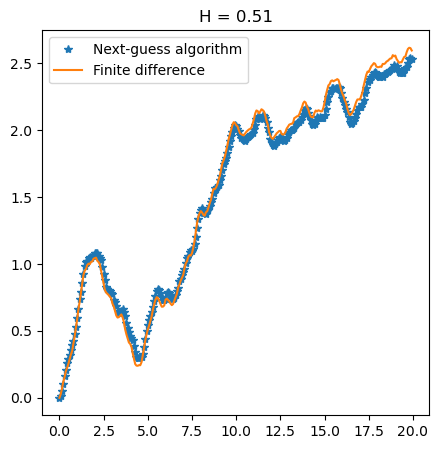

In [12]:
H = 0.51
N = 280
T = 20
id = 1

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)

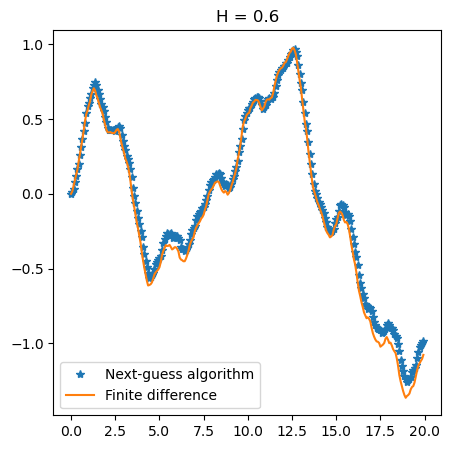

In [15]:
H = 0.6
N = 280
T = 20
id = 2

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)

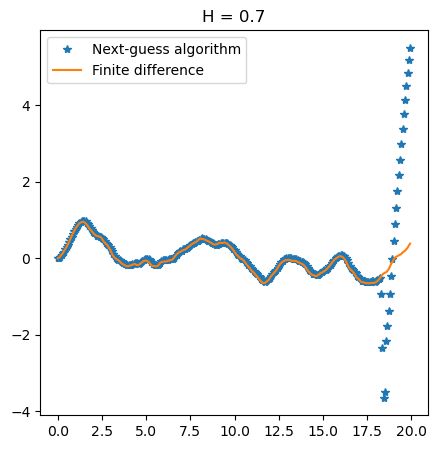

In [16]:
H = 0.7
N = 280
T = 20
id = 3

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)

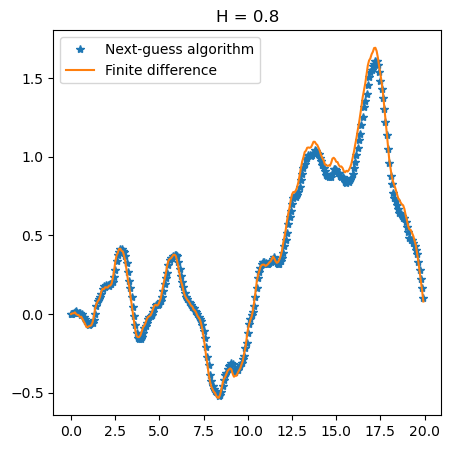

In [17]:
H = 0.8
N = 280
T = 20
id = 4

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)

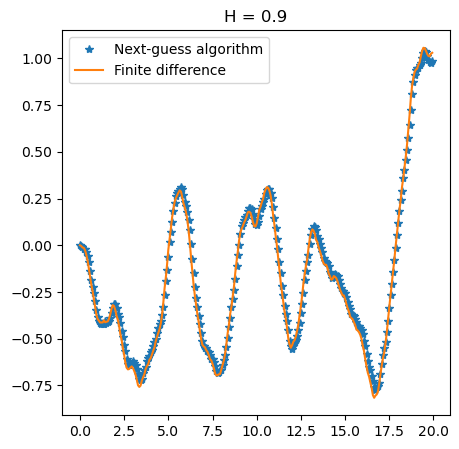

In [18]:
H = 0.9
N = 280
T = 20
id = 5

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)

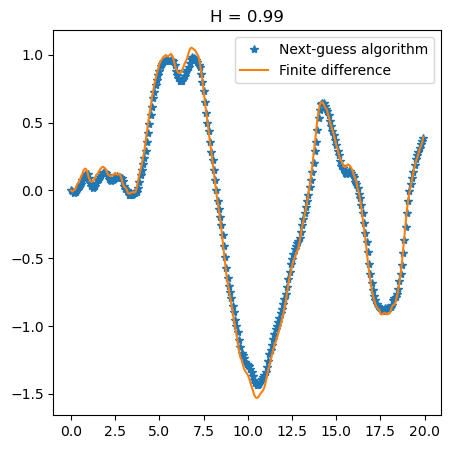

In [19]:
H = 0.99
N = 280
T = 20
id = 6

fig, ax = plt.subplots(figsize = (5, 5))
plot_comparison(H, N, T, id, ax)